# Will age and time played predict subscribe status of the players in the minecraft server?

Sofie Zalkan, Junchi Fang, Jenny Ho, Selene Wan

## Introduction:

The goal of this project is to analyze real data sets to generate predictive insights that can inform and guide the project's direction. The data set used is the MineCraft server established by a research group in Computer Science at the University of British Columbia (UBC), led by Frank Wood. The server monitors each player's actions as they explore the game in order to collect and investigate data on a player’s behaviour with video games. However, due to limited resources, the research team needs to know how to target their recruitment effectively to ensure that the server can handle the quantity of players that will prove the maximum amount of data.

>>*Our research question is: can a player’s age and time played in the server predict their newsletter subscription status?*

The data set that we are using for this project is the **player.csv**, as it contains all the variables needed to predict the subscription status. There are 196 observations and 7 variables within this set. 

These are the 7 variables in the **player.csv**: 

- `experience` (character ) = skill level the player is at (Pro, Veteran, Regular, Amateur)
  
- `hashedEmail` (character ) =  hashed emails of the participants

  
- `Name` (character ) = name of all participants

  
- `Gender` (character ) = gender of participants (Male, Female, Non-binary, Agender, Prefer not to say, Two-Spirited)

  
- `Played_hours` (double) = total time of played hours

  
- `Age` (double) = ages of participants

  
- `Subscribe` (logical ) = subscription status, TRUE (subscribed) and FALSE (not subscribed)

We aim to use this dataset to build a classification model that will determine if the connection between age and time played can predict whether or not the player is subscribed to the newsletter. Based on calculated results, the information will aid the research team more effectively with finding their target market.

## Methods and Results:

To begin data analysis, we attach the necessary packages.

In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

We'll now load in the data. We'll only be using the players dataset as the sessions dataset is irrelevant to our question.

In [4]:
players <- read_csv(file = "https://raw.githubusercontent.com/sofiezalkan/DSCI-100-Group-Project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


This data is already tidy. Each column is a single variable, each row is a single observation, and each cell is a single value. We want to select only the columns we need for data analysis and filter out any N/A values. We'll also want to mutate the subscribe column to be factor instead of logical so classification works.

In [5]:
players_clean <- players |>
                select(played_hours, Age, subscribe) |>
                filter(Age != "NA") |>
                mutate(subscribe = as.factor(subscribe))
players_clean

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
⋮,⋮,⋮
0.0,20,TRUE
0.0,17,TRUE
0.3,22,FALSE


Let's look at the mean, median, and standard deviation for our quantitive variables, age and played hours.

In [6]:
players_stats <- players_clean |>
                    summarize(mean_age = mean(Age), median_age = median(Age), sd_age = sd(Age),
                              mean_hrs = mean(played_hours), median_hrs = median(played_hours), sd_hrs = sd(played_hours))
players_stats

mean_age,median_age,sd_age,mean_hrs,median_hrs,sd_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,19,6.174667,5.904639,0.1,28.49793


We can gather from this that on average, the players are around 20 years old, with a spread out age distribution. The distribution of played hours is very spread out and the mean and median are quite far apart, implying a very large skew to the right. The "average" player has played for around 5 hours.

Let's also look at the qualititative variable, subscribe. We will find the proportion of subscribed players vs. unsubscribed players.

In [7]:
subscribe_count <- players_clean |>
                            count(subscribe)
subscribe_count

subscribe,n
<fct>,<int>
FALSE,52
TRUE,142


We see here that more people are subscribed to the newsletter than not subscribed, with about 73% of the sample being subscribed. We want to figure out if age and played hours can predict if someone will subscribe.

Let's make some visualizations to explore the data. We'll plot age vs. time played on a scatterplot, color-coded by subscribe, and we'll also plot the distributions of age and played hours as histograms. The histograms will also be color-coded.

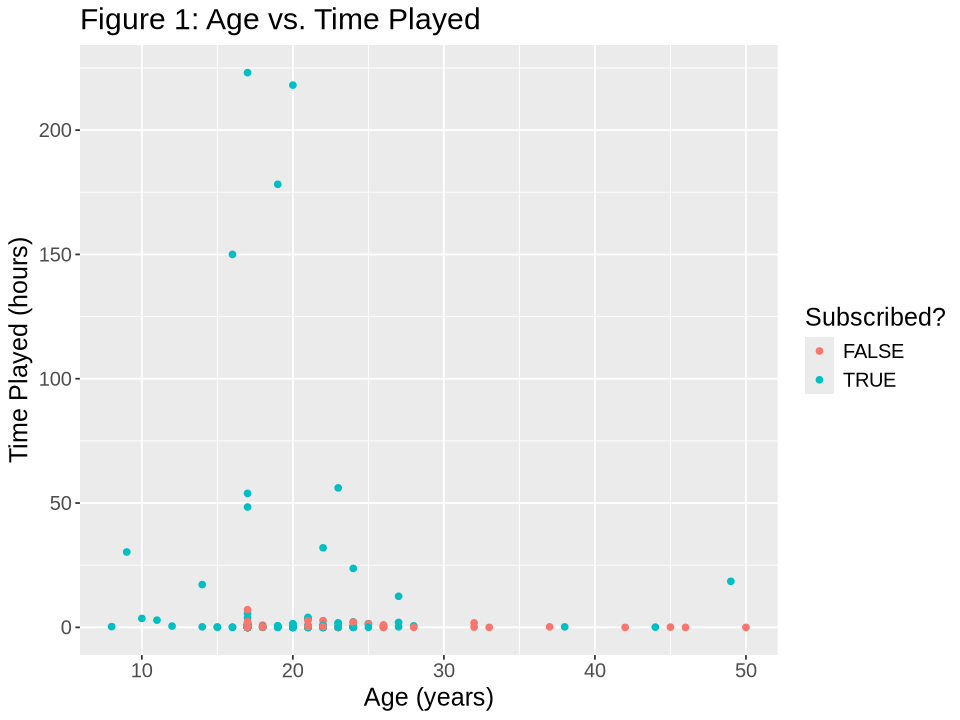

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

all_plot <- players_clean |>
                ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
                geom_point() +
                labs(x = "Age (years)", y = "Time Played (hours)", colour = "Subscribed?") +
                ggtitle("Figure 1: Age vs. Time Played") +
                theme(text = element_text(size = 15))
all_plot

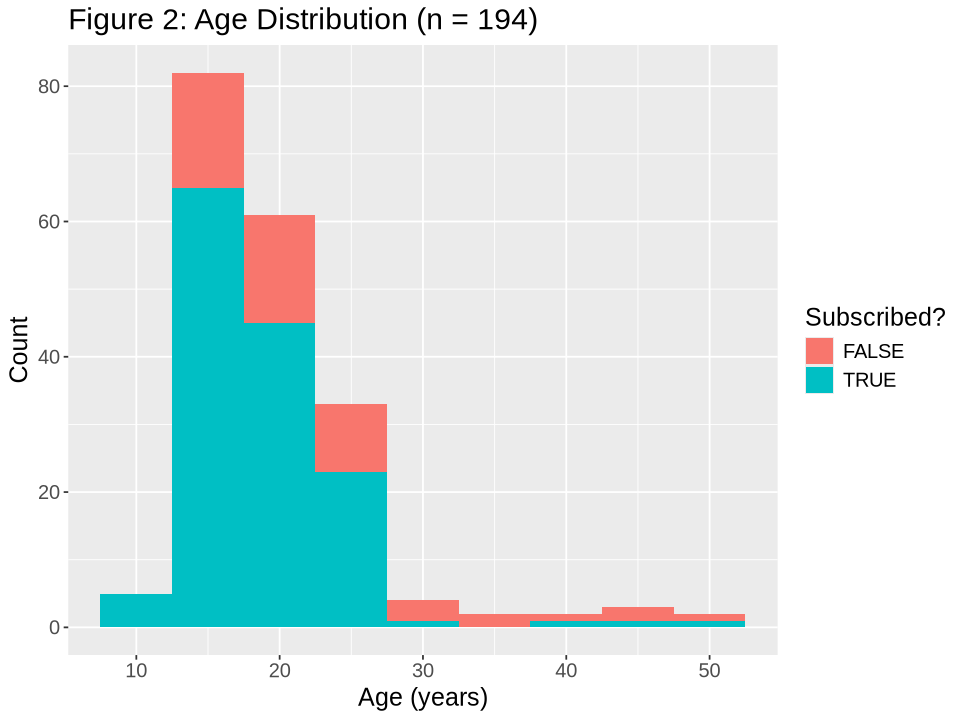

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)

age_dist <- players_clean |>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(binwidth = 5) +
            labs(x = "Age (years)", y = "Count", fill = "Subscribed?") +
            ggtitle("Figure 2: Age Distribution (n = 194)") +
            theme(text = element_text(size = 15))
age_dist            

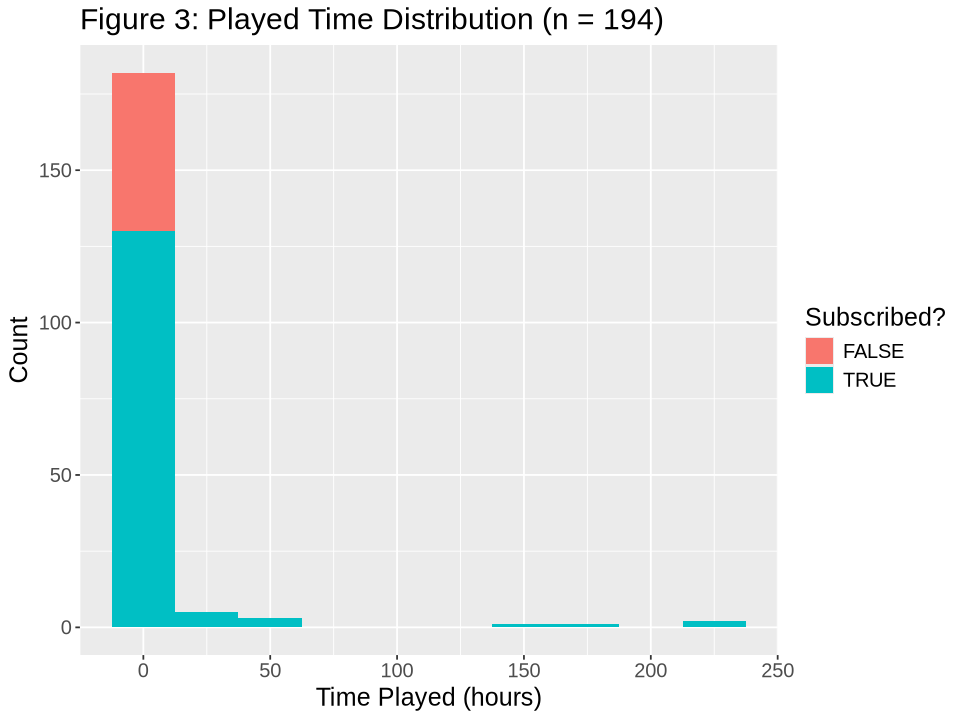

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)

time_dist <- players_clean |>
            ggplot(aes(x = played_hours, fill = subscribe)) +
            geom_histogram(binwidth = 25) +
            labs(x = "Time Played (hours)", y = "Count", fill = "Subscribed?") +
            ggtitle("Figure 3: Played Time Distribution (n = 194)") +
            theme(text = element_text(size = 15))
time_dist

We see that both distributions (Figure 2 and Figure 3) are skewed to the right and very spread out, with neither one of them resembling a normal distribution. The plot of age vs. played hours (Figure 1) does not show a particular correlation between age and time, the predictor variables, but there seems to be a possible trend in subscribed vs. unsubscribed players.

We want to see if age and time can predict if someone will subscribe to a newsletter, so we will be using KNN classification, to fit observations into one of the two categories. We start by splitting the data into a training and testing set, with 75% of data going into the training set.

In [11]:
set.seed(2345)

players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)
players_train
players_test

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
0.0,17,FALSE
0.0,21,FALSE
0.0,22,FALSE
1.4,25,FALSE
0.0,24,FALSE
⋮,⋮,⋮
32.0,22,TRUE
0.1,44,TRUE
0.0,17,TRUE


played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.1,17,TRUE
0.0,22,TRUE
1.6,23,TRUE
⋮,⋮,⋮
0.0,50,FALSE
0.1,17,TRUE
0.0,17,TRUE


Let's make a recipe and include the steps to standardize the data.

In [12]:
set.seed(2025)

knn_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
knn_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



We will now create our classification model configuration, with the neighbors set to 3 for now. We will tune later.

In [13]:
set.seed(2025)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


Now let's create a workflow and fit our training data.

In [14]:
set.seed(2025)

knn_fit <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(knn_spec) |>
                fit(data = players_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3655172
Best kernel: rectangular
Best k: 3

We now want to test the accuracy of our model using the testing data. We'll pass the testing set to our model to predict the values and collect the metrics.

In [15]:
set.seed(2025)

predictions <- predict(knn_fit, players_test) |>
                    bind_cols(players_test)

accuracy <- predictions |>
            metrics(truth = subscribe, estimate = .pred_class)
                    
accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6122449
kap,binary,0.1141770


We can see from these metrics that the accuracy is about 61%, which is not great. We may be able to improve the accuracy with cross-validation and tuning. Let's first perform a cross-validation with five folds.

In [16]:
set.seed(2025)

vfold <- vfold_cv(players_train, v = 5, strata = subscribe)
vfold

Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 115, 116, 117

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NUL

Now we're going to use this cross validation to tune our model to find the optimal k-value for maximum accuracy. Let's test k-values of 1 through 10. We'll also need to create a new model that will tune the number of neighbors.

In [17]:
set.seed(2025)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

results <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = vfold, grid = k_vals) |>
      collect_metrics()

results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5246141,5,0.03466292,Preprocessor1_Model01
1,roc_auc,binary,0.5555195,5,0.06301844,Preprocessor1_Model01
2,accuracy,binary,0.5239080,5,0.02589755,Preprocessor1_Model02
2,roc_auc,binary,0.5683789,5,0.05964510,Preprocessor1_Model02
3,accuracy,binary,0.5941051,5,0.02587763,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,roc_auc,binary,0.5185374,5,0.07566004,Preprocessor1_Model08
9,accuracy,binary,0.5804762,5,0.06336787,Preprocessor1_Model09
9,roc_auc,binary,0.5158395,5,0.07092082,Preprocessor1_Model09


Let's plot this data to find and to visualize the optimal k-values.

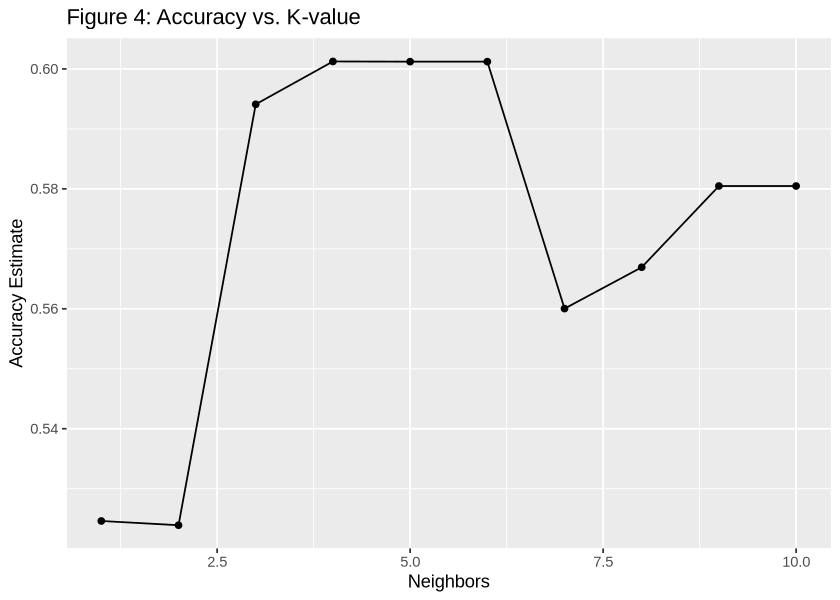

In [18]:
options(repr.plot.width = 7, repr.plot.height = 5)

accuracies <- results |> 
      filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Figure 4: Accuracy vs. K-value")

accuracy_vs_k

We see in Figure 4 above that the k-values with the highest accuracies are 4, 5, and 6. Let's extract the _most_ accurate k-value of the three from the dataframe used for the plot.

In [19]:
highest_accuracy <- accuracies |>
                    slice_max(mean)
highest_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,accuracy,binary,0.6012479,5,0.03197401,Preprocessor1_Model04


We can see that 4 neighbors produces the highest accuracy for the model, with an accuracy of 60%. Let's create a final model specification with this k-value to confirm this result.

In [20]:
set.seed(2025)

knn_spec_4 <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
      set_engine("kknn") |>
      set_mode("classification")

final_fit <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(knn_spec_4) |>
                fit(data = players_train)

final_predictions <- predict(final_fit, players_test) |>
                    bind_cols(players_test)
final_predictions

.pred_class,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,TRUE
TRUE,3.8,17,TRUE
TRUE,0.1,17,TRUE
TRUE,0.0,22,TRUE
TRUE,1.6,23,TRUE
⋮,⋮,⋮,⋮
FALSE,0.0,50,FALSE
TRUE,0.1,17,TRUE
FALSE,0.0,17,TRUE


We'll create two scatterplots, coloring the points of one plot based on the predictions and the points of the other plots based on the true values. We can compare them side by side as a visualization of the accuracy of the model.

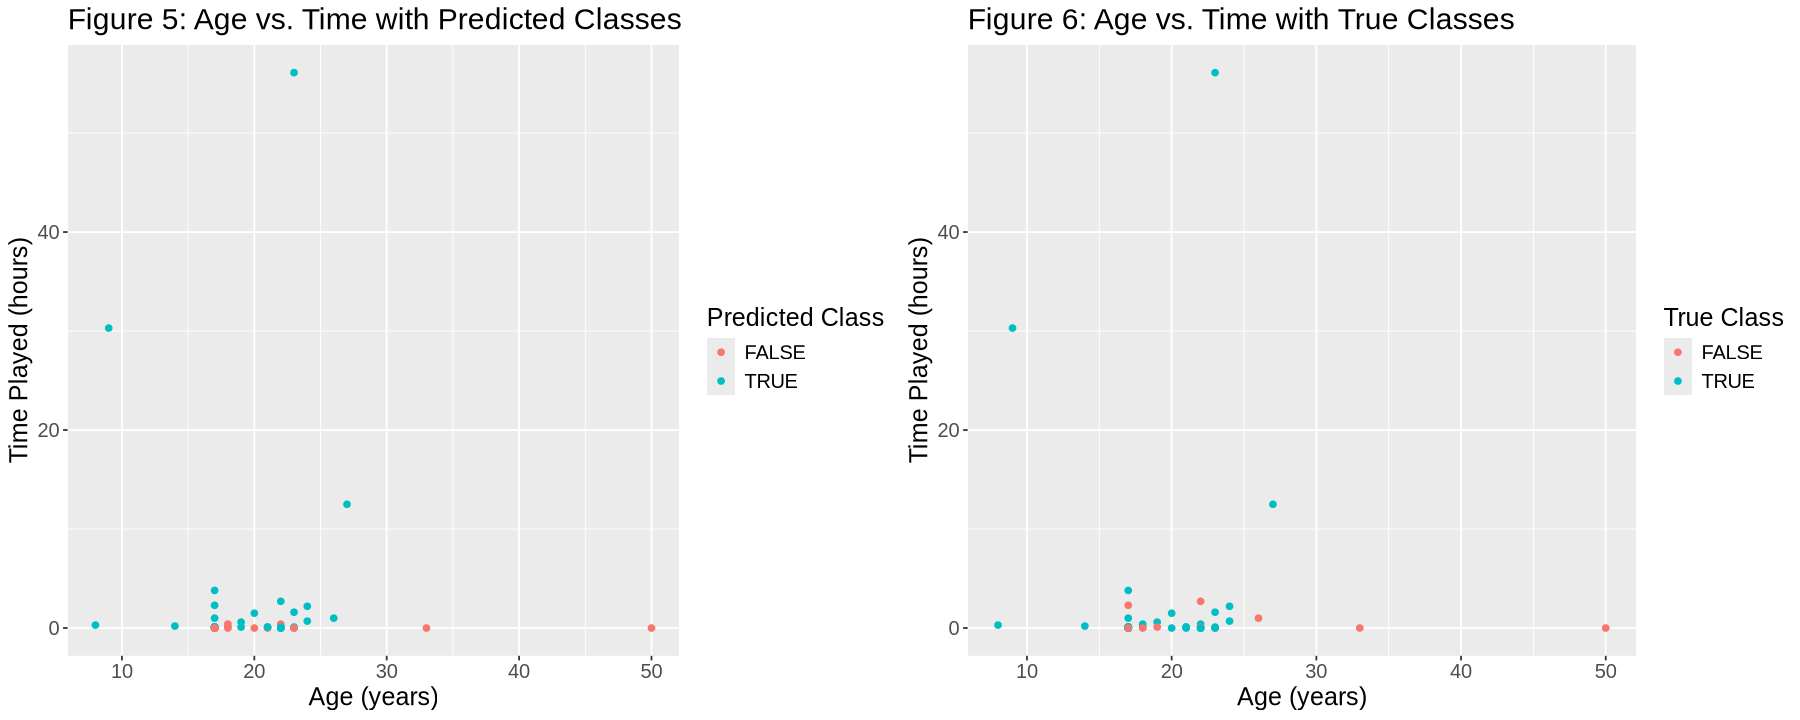

In [21]:
options(repr.plot.width = 15, repr.plot.height = 6)

predictions_plot <- final_predictions |>
                    ggplot(aes(x = Age, y = played_hours, colour = .pred_class)) +
                    geom_point() +
                    labs(x = "Age (years)", y = "Time Played (hours)", colour = "Predicted Class") +
                    ggtitle("Figure 5: Age vs. Time with Predicted Classes") +
                    theme(text = element_text(size = 15))

true_plot <- final_predictions |>
                    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
                    geom_point() +
                    labs(x = "Age (years)", y = "Time Played (hours)", colour = "True Class") +
                    ggtitle("Figure 6: Age vs. Time with True Classes") +
                    theme(text = element_text(size = 15))

plot_grid(predictions_plot, true_plot, ncol = 2)

Note that these plots only contain the testing data and not the full set of data. The whole dataset is fairly small and thus the testing samples are small as well.

One final time, we will extract the accuracy of this model with the optimal k-value.

In [22]:
final_accuracy <- final_predictions |>
                    metrics(truth = subscribe, estimate = .pred_class)|>
                    filter(.metric == "accuracy") |>
                    select(.estimate)
final_accuracy

.estimate
<dbl>
0.5918367


The accuracy of our final optimized model is 59.1% percent.

## Discussion

### Summary of Findings
The analysis explored whether a player's age and time played on the Minecraft server could predict their newsletter subscription status. 

Key findings include:

*Statistics of Players: The average age of players sampled during the survey was around 20 years old, with the median age being 19. The average hours played of the game is around 6 hours, but as we will soon discuss this is a highly right-skewed statistic due to a great number of players not actually playing the game and a very few playing excessive hours.

* Age Distribution: The average player age was around 20 years, with a wide spread across the dataset. Figure 2 showed that younger players (e.g., teens to early 20s) were more prevalent, but subscription status did not exhibit a clear age-dependent trend. Both subscribed (TRUE) and unsubscribed (FALSE) players were distributed similarly across age groups.  One factor to note is the heavy right-skew of the graph because the great majority of the demographic sampled for the study is under 30 years old, resulting in a histogram that in no way resembles a normal distribution. As this issue results from the uneven sampling from the study itself this will be ignored but could be improved in future studies.

* Time Played: Played hours were highly right-skewed (Figure 3), with most players logging fewer than 50 hours (median ~5 hours), while a few played excessively (up to 250 hours). Subscribed players appeared slightly more common among those with moderate to high playtime.

* Predictive Relationship: Figure 2 (Age Distribution) suggests that younger players (Age < 20) have a higher tendency (higher proportion) to subscribe to game news (higher proportion), while only a small number of players over 30 years old choose to subscribe to game news. Figure 3 (Played Time Distribution) suggests that players who play for more than 50 hours tend to subscribe to game news, and most gamers who play games for less than 50 hours also tend to subscribe to game news.

* KNN Model: We decided to use time played and age to try to predict whether a player is subscribed to a newsletter or not, and to do so we needed the best k number, which turned out to be 4 neighbors illustrated in Figure 4 where 4 neighbors peaked in accuracy. After using the training models to check the accuracy of our predictions we realized that as demonstrated in Figure 5 and Figure 6, there is some significant error between the predicted and true values in our data. Therefore checking accuracy we found our model only has an accuracy of 59.18%.

### Analysis of Results
Based on our initial research question—can a player’s age and time played on a Minecraft server predict their newsletter subscription status?—we expected to find at least a moderate relationship between the two predictor variables (age and played hours) and the subscription outcome. This expectation was grounded in the assumption that more engaged players (those who spend more time on the server) or players of certain age groups might be more inclined to stay connected by subscribing to updates.

However, the results from our K-Nearest Neighbors (KNN) classification model were somewhat underwhelming, with an accuracy of only 59.18%. This accuracy is just marginally better than random guessing in a binary classification setting, suggesting that age and time played alone are not strong predictors of subscription status.

This finding did not fully align with our expectations. We anticipated that players who were younger (perhaps more enthusiastic or curious about game updates) or who played significantly more hours (indicating deeper engagement) would more reliably fall into the "subscribed" group. While some trends in the data did loosely support this idea—such as higher subscription proportions among younger users and those who played more than 50 hours—these trends were not strong enough to yield high predictive accuracy.

### Impacts May Have

Newsletters can serve as a powerful marketing tool for game companies by tailoring content to different player demographics. Specifically, since players under 20 show a higher tendency to subscribe, optimizing newsletters with youth-oriented content—such as memes, challenge announcements, or influencer collaborations—could enhance engagement. Moreover, incorporating gamification elements like "Subscribe for exclusive rewards!" may further encourage younger players to sign up.

When it comes to player retention, moderate-to-high playtime players (Gmae hours>50) can be effectively engaged through newsletters that offer exclusive sneak peeks at upcoming updates, VIP event invitations, or player spotlights. This strategy reinforces their investment in the game and keeps them engaged over time. On the other hand, low-playtime subscribers, who may have signed up out of curiosity, could be re-engaged through targeted emails with messages like, "We miss you! Here’s what’s new," potentially drawing them back into the game.

In terms of content and communication, adjustments should be made based on player demographics. For instance, older players (Age>30) may prefer concise, informative updates, such as patch notes or bug fixes, rather than flashy promotions. Similarly, playtime-based segmentation can enhance relevance—while high-playtime subscribers might appreciate in-depth content like meta-strategy discussions or developer Q&As, casual players may respond better to quick highlights, such as new skins or limited-time events.

From a monetization standpoint, offering subscription-exclusive perks—such as in-game costumes, early access, or bonus XP—could convert passive readers into active and even paying players. Additionally, leveraging social proof by featuring top subscribed players in newsletters (e.g., "Fast Clearance List") may motivate others to join and increase their playtime.

However, there are potential risks to consider. If not managed carefully, over-messaging or sending irrelevant content may lead to player frustration, resulting in unsubscribes. Therefore, striking the right balance in frequency and relevance is crucial to maintaining a positive relationship with subscribers.

Overall, by segmenting audiences, personalizing content, and avoiding excessive communication, game companies can maximize the effectiveness of newsletters as both a marketing and retention tool

### Future Research Questions
Follow-up research might pursue many underlying questions to further our understanding of player engagement time and newsletter effectiveness. First, it remains unclear if longer gameplay is associated with a rise in newsletter subscriptions, or if, alternatively, already subscribed players play longer as a result of increased engagement. Elucidating this causal relationship would be helpful in determining if newsletters engage players or simply reflect existing player tendencies.

Also important is that scholars examine other factors that can influence subscription patterns beyond simple age and gameplay. Variables like in-game spending, socializing with other gamers, and the dominant game models might be beneficial to analyze.

Another important part to consider what different types of players find interesting. For instance, are younger players more engaged with memes and connections with influencers? Meanwhile, are older players more focused on reading patch notes and receiving updates from developers? By understanding these preferences, we can create newsletter content that better meets the needs of all age groups.

One particularly confounding trend is the lower subscription rate among people over the age of 30. Future research should examine if this is due to content relevance, communication frequency, or platform preference (e.g., email compared to in-game notifications). Identifying these barriers could allow for the creation of specific strategies for increasing engagement among older age groups.

Finally, it is important for researchers to examine the degree to which these patterns hold true in different regions and cultures. Comparative studies might reveal important geographical variations in player behavior, thus enabling more focused and effective marketing strategies.

Through an analysis of these questions, future studies can refine marketing strategies, enhance player engagement, and gain greater insight into what factors contribute to newsletter signups. This would allow for the construction of even more customized and effective communication strategies in the gaming industry.